<a href="https://colab.research.google.com/github/shreya-gundoju/MNIST/blob/main/DL_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

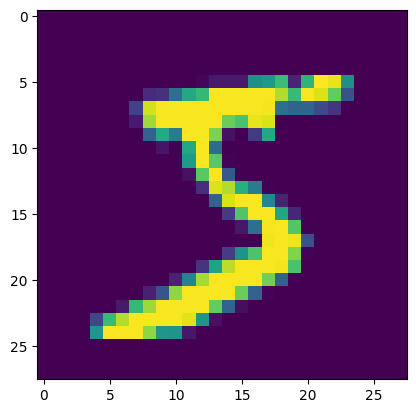

In [ ]:
plt.imshow(X_train[0])
plt.show()

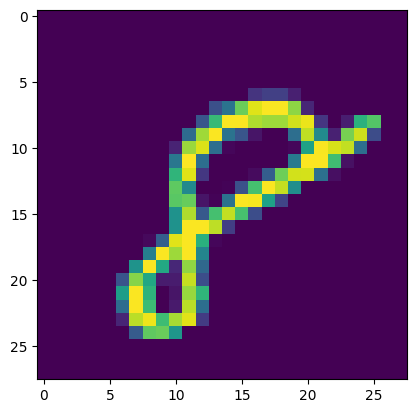

In [ ]:
plt.imshow(X_train[59999])
plt.show()

In [ ]:
print(y_train[0])

5


In [ ]:
import numpy as np
print(np.max(X_train),np.min(X_train))
print(np.max(X_test),np.min(X_test))

255 0
255 0


In [ ]:
X_train=X_train.astype('float')
X_test=X_test.astype('float')

In [ ]:
#Normalization
mean=np.mean(X_train)
std=np.std(X_train)

X_train-=mean
X_train/=std

X_test-=mean
X_test/=std

print(np.max(X_train),np.min(X_train))
print(np.max(X_test),np.min(X_test))


2.821543345689335 -0.424073894391566
2.821543345689335 -0.424073894391566


In [ ]:
type(y_train[0])

numpy.uint8

In [ ]:
from keras.utils import to_categorical
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],784)
X_test=X_test.reshape(X_test.shape[0],784)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
#Normalization
x_train= x_train/x_train.max()
x_test= x_test/x_test.max()
print(x_train[0])
print(x_train.max())
print(x_train.min())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
from keras.utils import to_categorical
print(type(y_train[0]))

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

print(y_train[0])

<class 'numpy.uint8'>
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#Flatten the image
x_train=x_train.reshape(x_train.shape[0],784)
x_test=x_test.reshape(x_test.shape[0],784)

In [ ]:
#Define the model
model=Sequential()

#Add the layers
model.add(Dense(100,input_dim=x_train.shape[1],activation='ReLU'))
model.add(Dense(64,activation='ReLU'))
model.add(Dense(10,activation='softmax'))

#Compile the model
model.compile(optimizer=SGD(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

#Callback
cb=ModelCheckpoint('model.keras',monitor= 'val_loss',mode='min',save_best_only=True)

#Train the model
result = model.fit(x_train,y_train,epochs=10, batch_size=32, validation_split=0.2,callbacks=cb)

#Predict the model
loss,acc =model.evaluate(x_test,y_test)
print("Loss:",loss)
print("Accuracy:",acc)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.0269 - accuracy: 0.4024 - val_loss: 1.6675 - val_accuracy: 0.6304
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.3270 - accuracy: 0.6926 - val_loss: 0.9912 - val_accuracy: 0.7769
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8502 - accuracy: 0.7980 - val_loss: 0.6821 - val_accuracy: 0.8408
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6428 - accuracy: 0.8401 - val_loss: 0.5461 - val_accuracy: 0.8633
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5402 - accuracy: 0.8590 - val_loss: 0.4720 - val_accuracy: 0.8774
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4798 - accuracy: 0.8722 - val_loss: 0.4271 - val_accuracy: 0.8903
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4400 - accuracy: 0.8808 - val_loss: 0.3959 - val_accuracy:

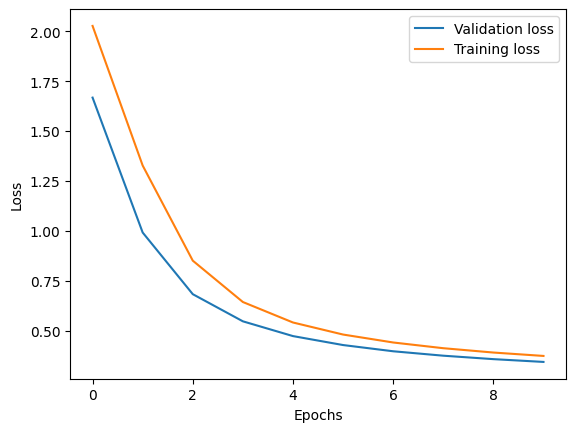

In [ ]:
plt.plot(result.history['val_loss'],label="Validation loss")
plt.plot(result.history['loss'],label="Training loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()